In [27]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set maximum columns to be displayed in the dataframe as 36
pd.set_option("display.max_columns", 36)

# Setting fontsizes, fontweights, label weights for labels, titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

# Set Seaborn style
sns.set_style("whitegrid")

In [28]:
from textblob import TextBlob

In [29]:
df = pd.read_csv("/home/kipkoech/Desktop/hotel_bookings.csv")

In [40]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


/tmp/ipykernel_178507/1201680833.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


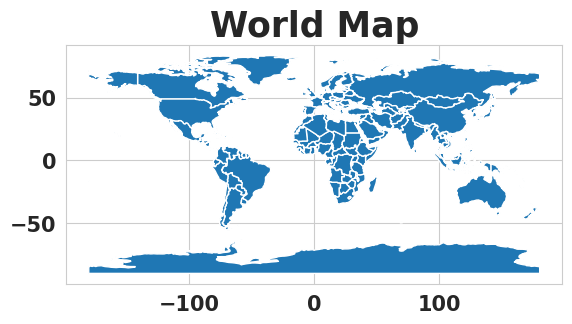

In [39]:

import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map from geopandas datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
world.plot()
plt.title('World Map')
plt.show()


In [ ]:
df.info()

## data description
# Reservation status
Canceled – booking was canceled by the customer
Check-Out – customer has checked in but already departed
No-Show – customer did not check-in and did inform the hotel of the reason why


In [7]:
# creating a copy of our dataset
df1=df.copy()

In [8]:
# columns name list
print(list(df1.columns))

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [10]:
# checking for the duplicate rows
df1.duplicated().value_counts() 

False    87396
True     31994
Name: count, dtype: int64

<Axes: ylabel='count'>

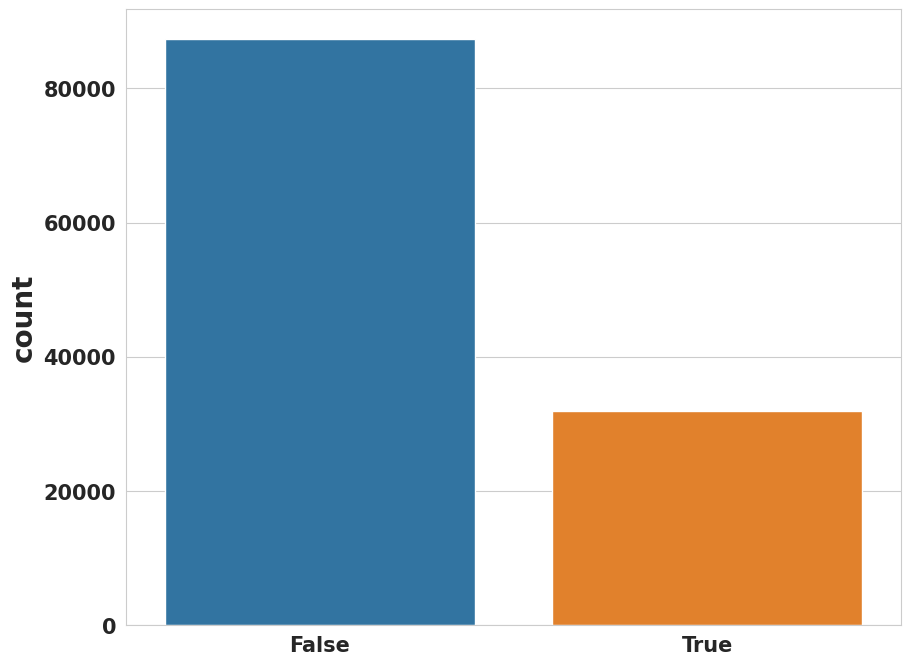

In [11]:
# Visulizing through Count pot
plt.figure(figsize=(10,8))
sns.countplot(x=df1.duplicated())

In [12]:
#dropping the duplicate rows
df1= df1.drop_duplicates()

# data set reduced

In [13]:
df1.shape

(87396, 32)

In [14]:
#checking for Null Values
df1.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,company,82137
1,agent,12193
2,country,452
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0


### Visulaizing null values through heatmap.

Text(0.5, 1.0, 'Places of missing values in column')

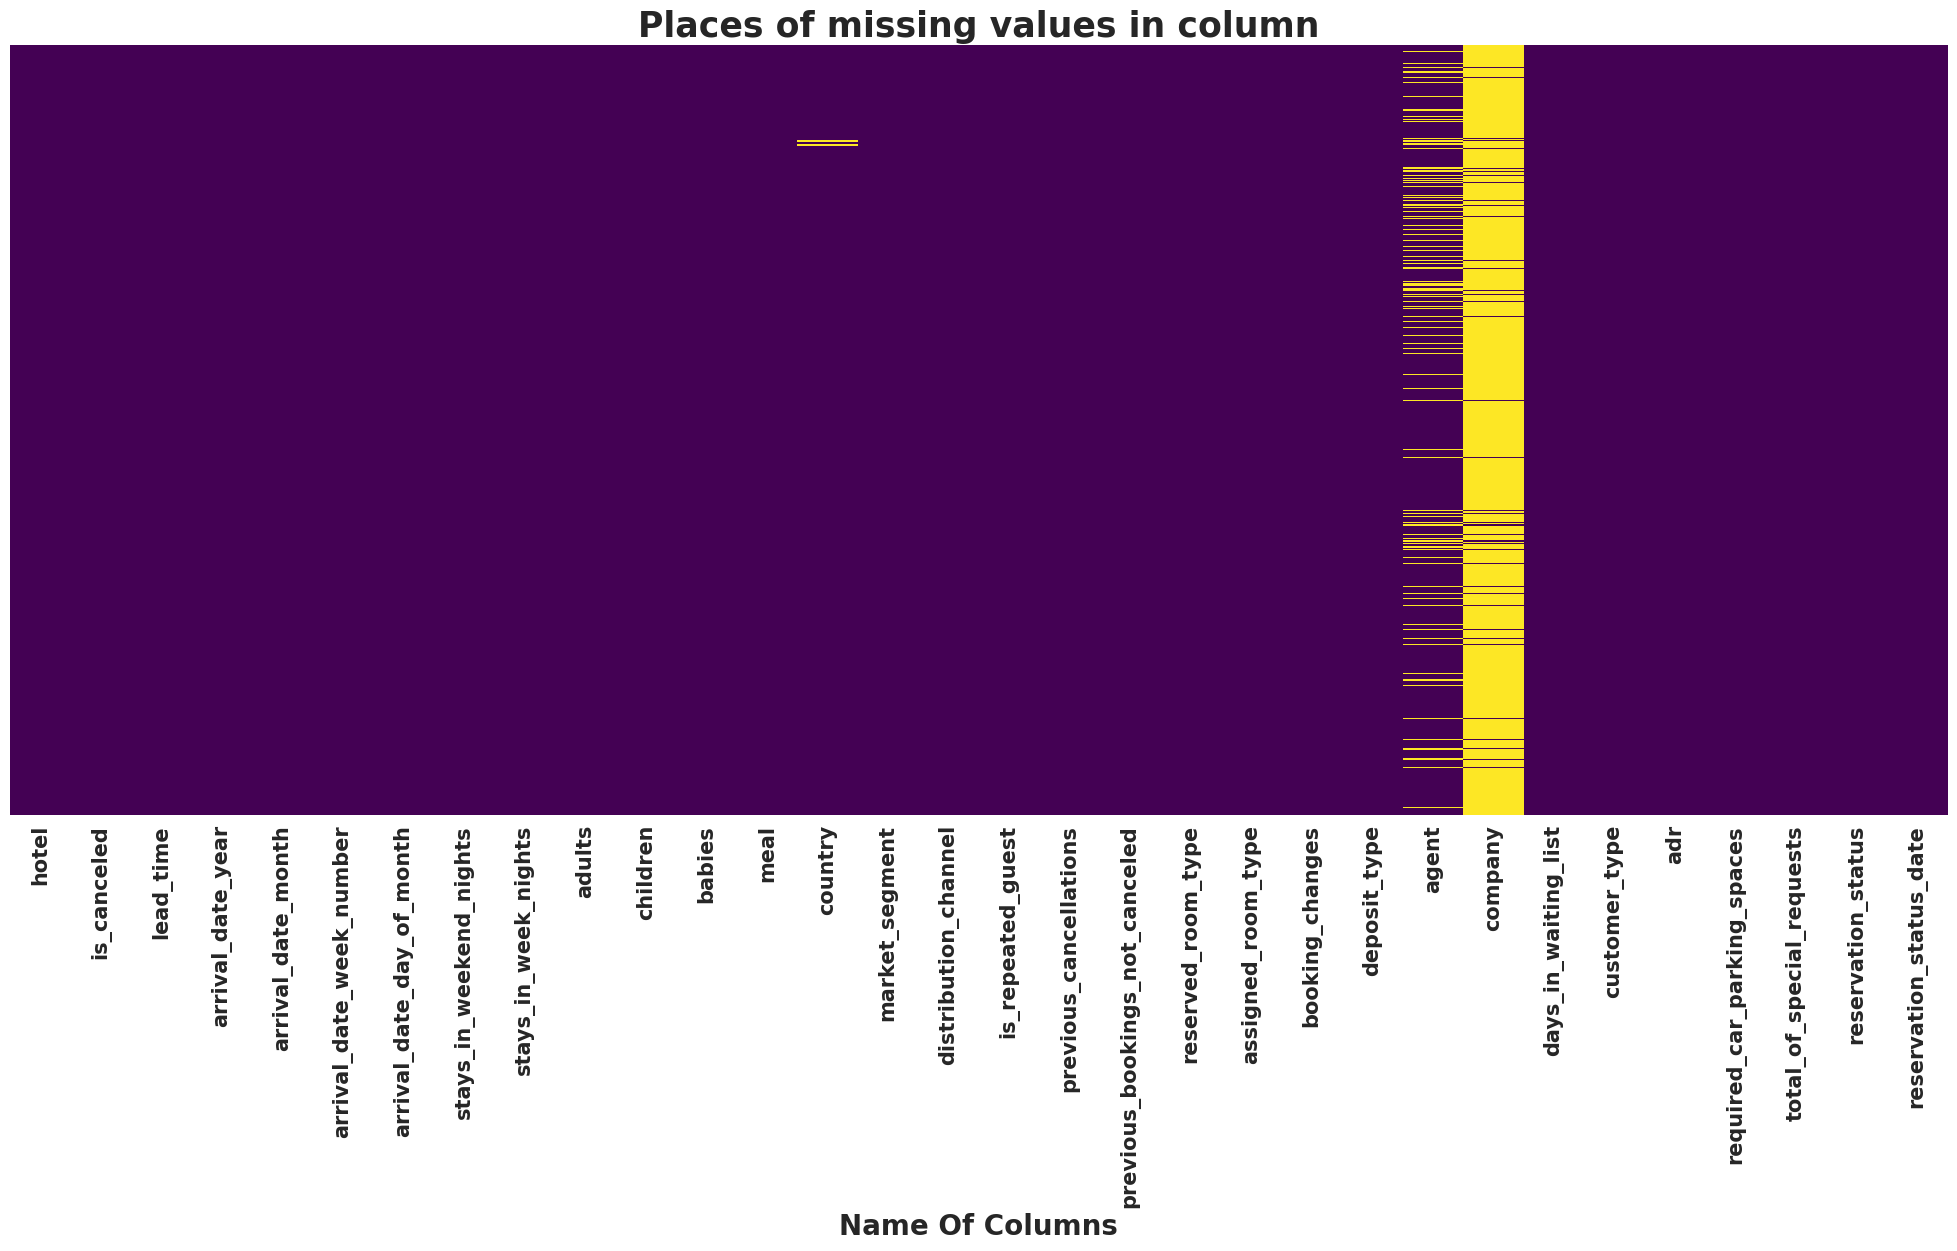

In [15]:
plt.figure(figsize=(25, 10))
sns.heatmap(df1.isnull(), cbar=False, yticklabels=False,cmap='viridis')
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column")

#### here  I fill the missing values with 0 for both agent, comapany and children

In [16]:
null_columns=['agent','children','company']
for col in null_columns:
  df1[col].fillna(0,inplace=True)


# Replacing NA values with 'others'
df1['country'].fillna('others',inplace=True)

In [17]:
df1.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})
# nul values are successfully handled

,Columns,Null values
0,hotel,0
1,is_canceled,0
2,reservation_status,0
3,total_of_special_requests,0
4,required_car_parking_spaces,0
5,adr,0


In [18]:
#droppping all 166 those rows in which addtion of of adlults ,children and babies is 0. That simply means  no bookings were made.
len(df1[df1['adults']+df1['babies']+df1['children']==0])
df1.drop(df1[df1['adults']+df1['babies']+df1['children']==0].index,inplace=True)

In [38]:

import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map from geopandas datasets
world = gpd.read_file(df.['country'])

# Plot the world map
world.plot()
plt.title('World Map')
plt.show()

SyntaxError: invalid syntax (4281203608.py, line 5)

In [19]:
# Checking the unique values in categorical columns.
categorical_cols=list(set(df1.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)-set(df1.describe()))
for col in categorical_cols:
  print(f'Unique values in column {col} are:, {(df1[col].unique())}')

Unique values in column reservation_status are:, ['Check-Out' 'Canceled' 'No-Show']
Unique values in column reserved_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']
Unique values in column market_segment are:, ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values in column meal are:, ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in column assigned_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']
Unique values in column hotel are:, ['Resort Hotel' 'City Hotel']
Unique values in column distribution_channel are:, ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in column customer_type are:, ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values in column deposit_type are:, ['No Deposit' 'Refundable' 'Non Refund']


In [20]:
# lets add some new columns

df1['total_people'] = df1['adults'] + df1['babies'] + df1['children']   
df1['total_stay'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']   

# EXPLORATORY DATA ANALYSIS

##Which hotel is mostly prefered by guest?

<Axes: ylabel='count'>

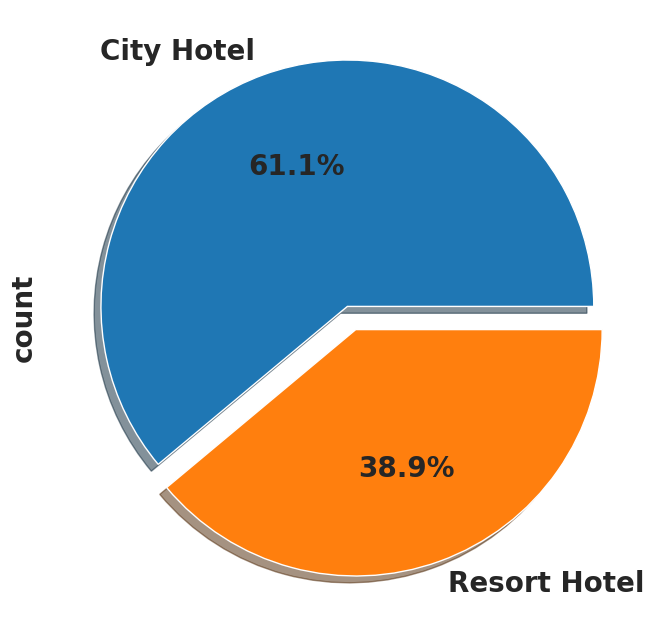

In [21]:
df1['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)   

# ##Which agent made the most Bookings
### return highest bookings made by guests

In [22]:
highest_bookings= df1.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

 # as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True) 

# taking top 10 bookings made by agent
top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings

,agent,Most_Bookings
9,9.0,28721
174,240.0,13028
14,14.0,3342
7,7.0,3294
183,250.0,2779
175,241.0,1644
27,28.0,1493
8,8.0,1383
1,1.0,1228
6,6.0,1117


Text(0.5, 1.0, 'Most Bookings Made by the agent')

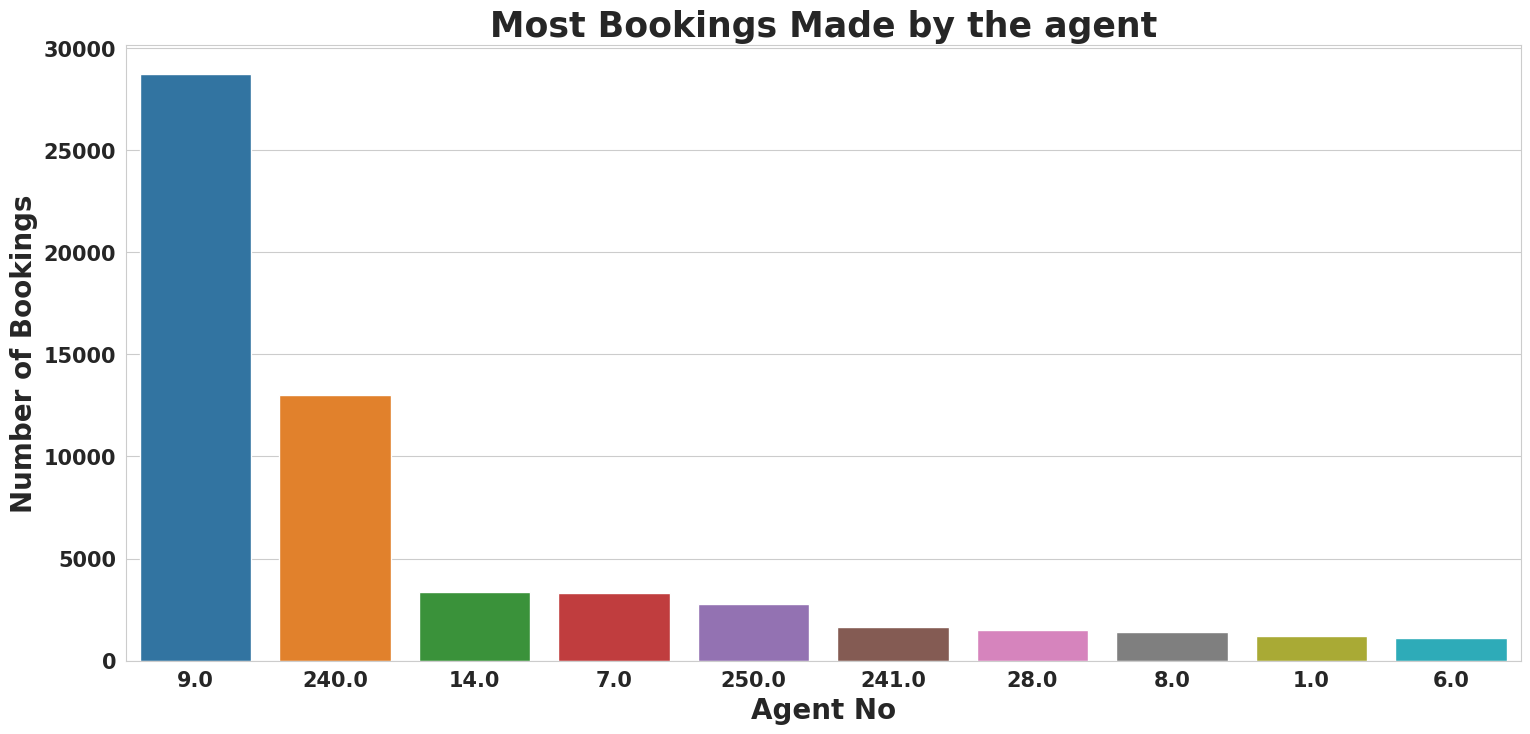

In [23]:
# visualizing
plt.figure(figsize=(18,8))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")


### Percentage of cancellation

Text(0.5, 1.0, 'Cancellation and non Cancellation')

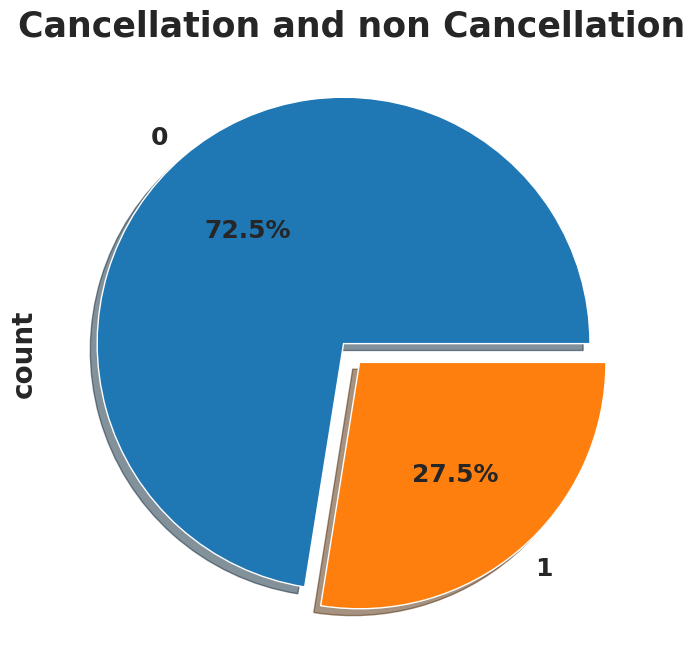

In [25]:
df1['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=18)
plt.title("Cancellation and non Cancellation")

#0= not canceled
#1= canceled

### #Percentage of repeated guests?

Text(0.5, 1.0, ' Percentgae (%) of repeated guests')

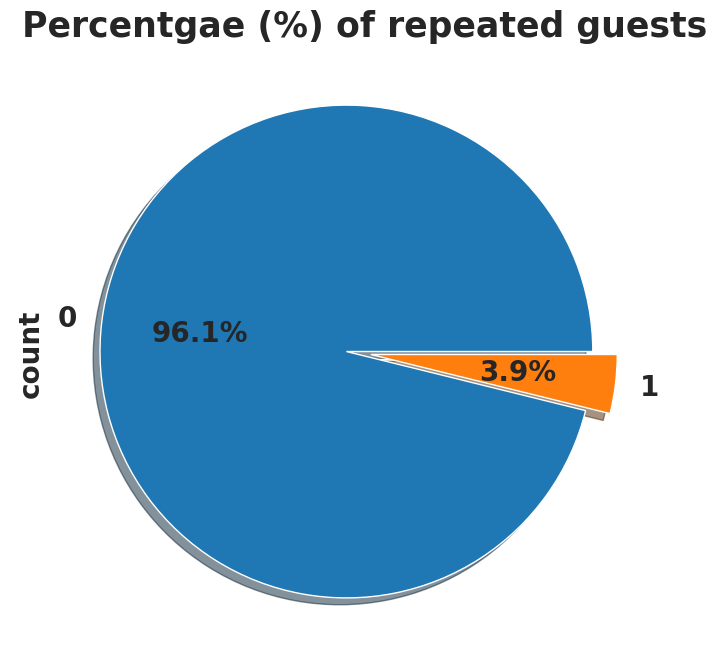

In [31]:
df1['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)

plt.title(" Percentgae (%) of repeated guests")

#repeated guest are very few 3.9%

#### #What is the percentage distribution of "Customer Type"?

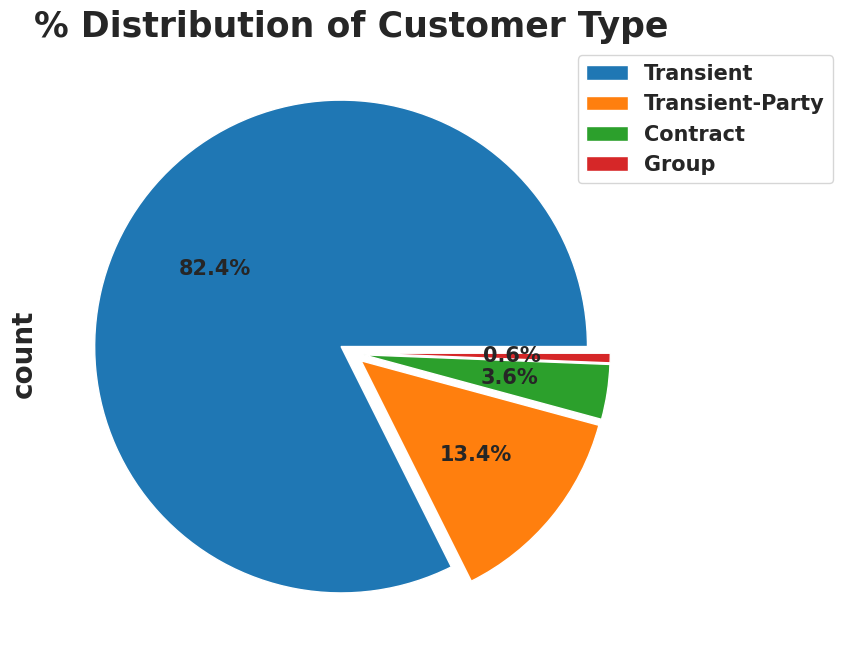

In [33]:
df1['customer_type'].value_counts().plot.pie(explode=[0.05]*4,shadow=False,autopct='%1.1f%%',figsize=(12,8),fontsize=15,labels=None)


labels=df1['customer_type'].value_counts().index.tolist()
plt.title('% Distribution of Customer Type')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

In [50]:
#pip install geopandas matplotlib pandas

df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [48]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pycountry

# Load your dataset
#df = pd.read_csv('hotel_bookings.csv')

# Function to convert ISO Alpha-2 to Alpha-3
def alpha2_to_alpha3(alpha2):
    try:
        return pycountry.countries.get(alpha_2=alpha2).alpha_3
    except AttributeError:
        return None

# Convert country codes in the dataset
df['country_alpha3'] = df['country'].apply(alpha2_to_alpha3)

# Extract unique ISO Alpha-3 country codes
countries_alpha3 = df['country_alpha3'].dropna().unique()

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to include only the countries mentioned in the dataset
world_countries = world[world['iso_a3'].isin(countries_alpha3)]

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world_countries.plot(ax=ax, color='lightblue', edgecolor='black')

# Customize the title and labels
plt.title('Countries Mentioned in Hotel Bookings', fontsize=20)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)

# Show the plot
plt.show()


LookupError: 

#### observations:
Transient customer type is more whcih is 82.4 %. percentage of Booking associated by the Group is vey low.

## #What is the percentage distribution of required_car_parking_spaces?



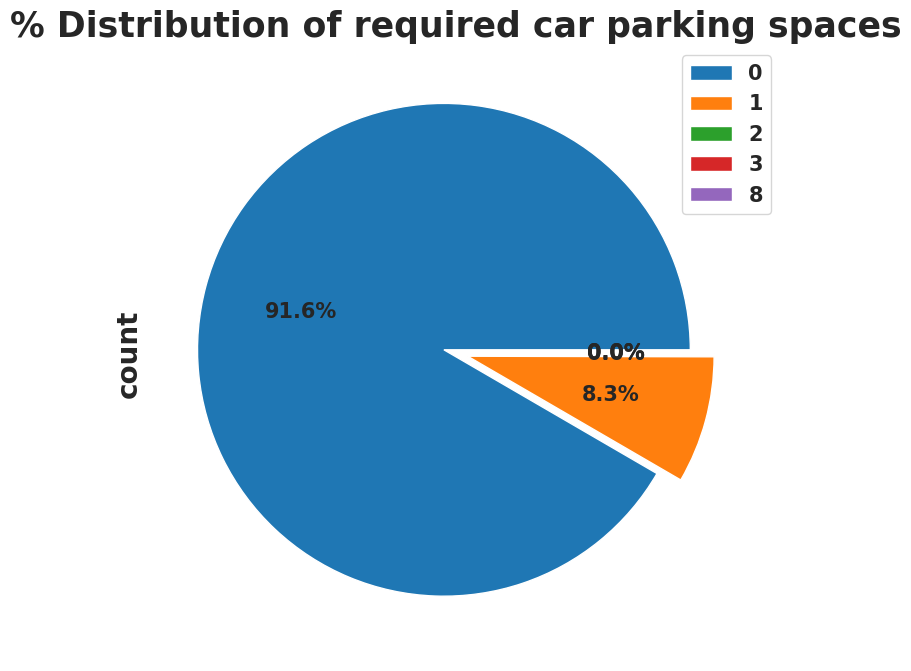

In [35]:
df1['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None)

labels=df1['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

### Observation: 
91.6 % guests did not required the parking space. only 8.3 % guests required only 1 parking space.

### # What is Percentage distribution of Deposite type ?.?

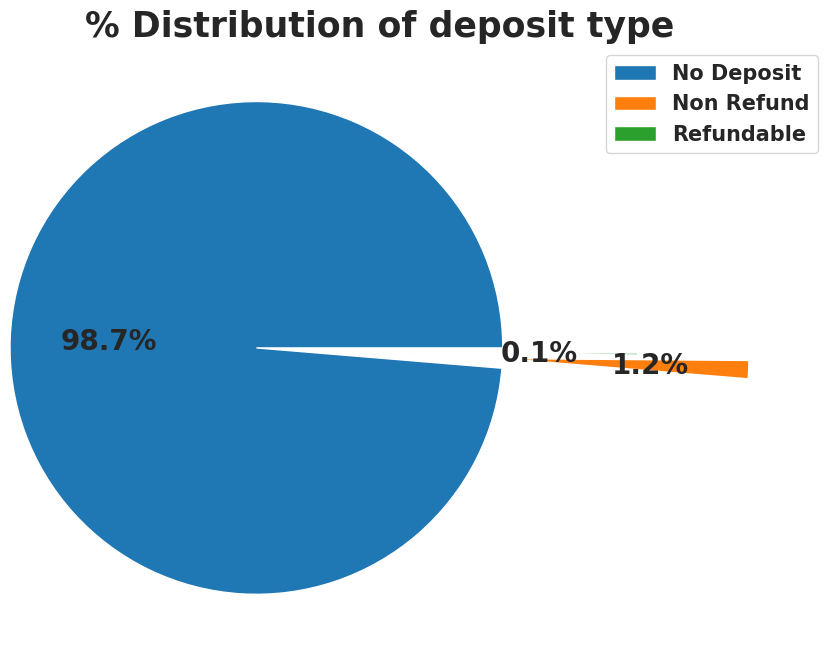

In [54]:

df1['deposit_type'].value_counts().plot.pie(explode=(0.5,0.5,0.05),autopct='%1.1f%%',shadow=False,figsize=(14,8),fontsize=20,labels=None)
plt.title("% Distribution of deposit type")
labels=df1['deposit_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)


#Observations : 98% prefer no deposit

### which food id mostly prefered by guest

Text(0.5, 1.0, 'Preferred Meal Type')

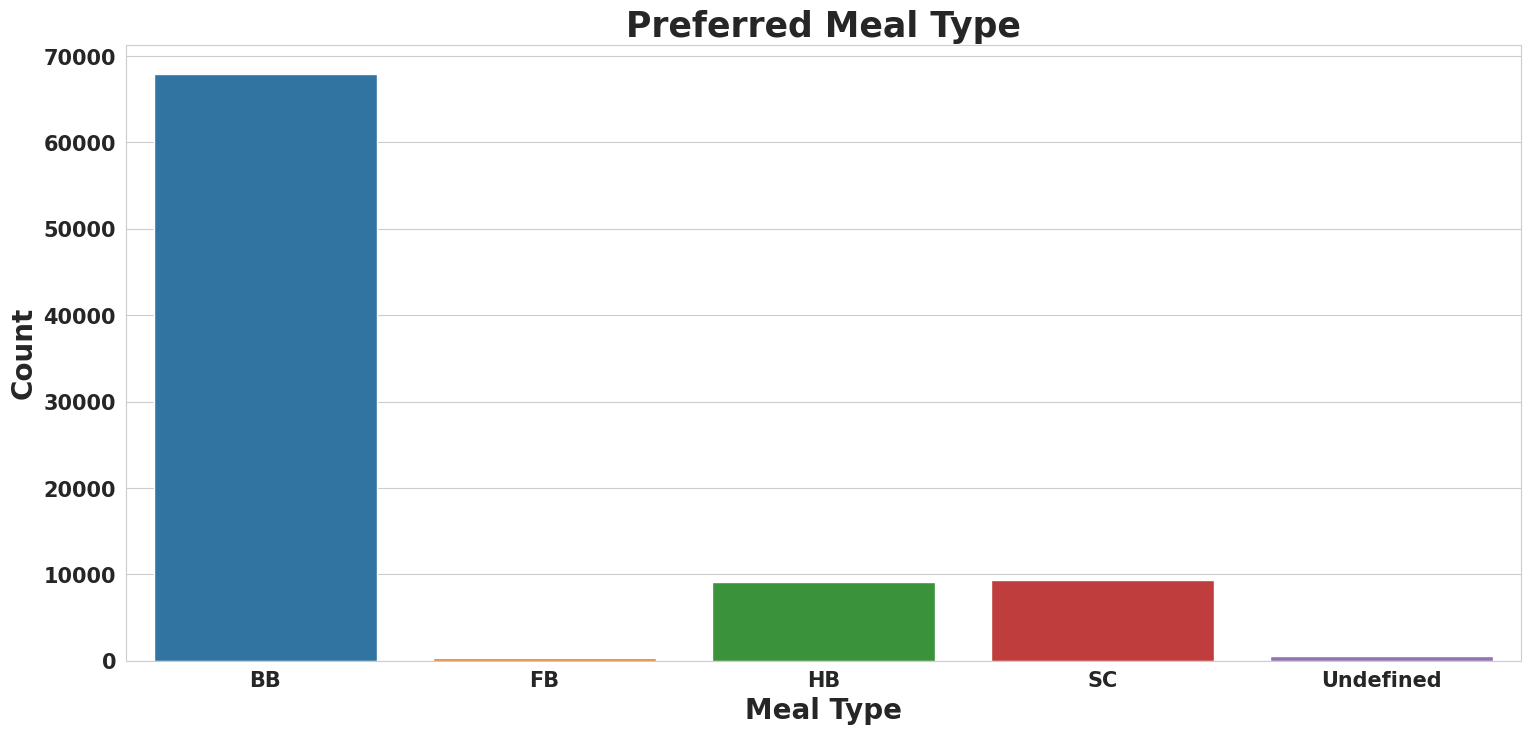

In [56]:
# df1['meal'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(20,15),fontsize=20)
plt.figure(figsize=(18,8))
sns.countplot(x=df1['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")


BB - (Bed and Breakfast)
HB- (Half Board)
FB- (Full Board)
SC- (Self Catering)

###  Which is the most preferred room type by the customers?

Text(0.5, 1.0, 'Most preferred Room type')

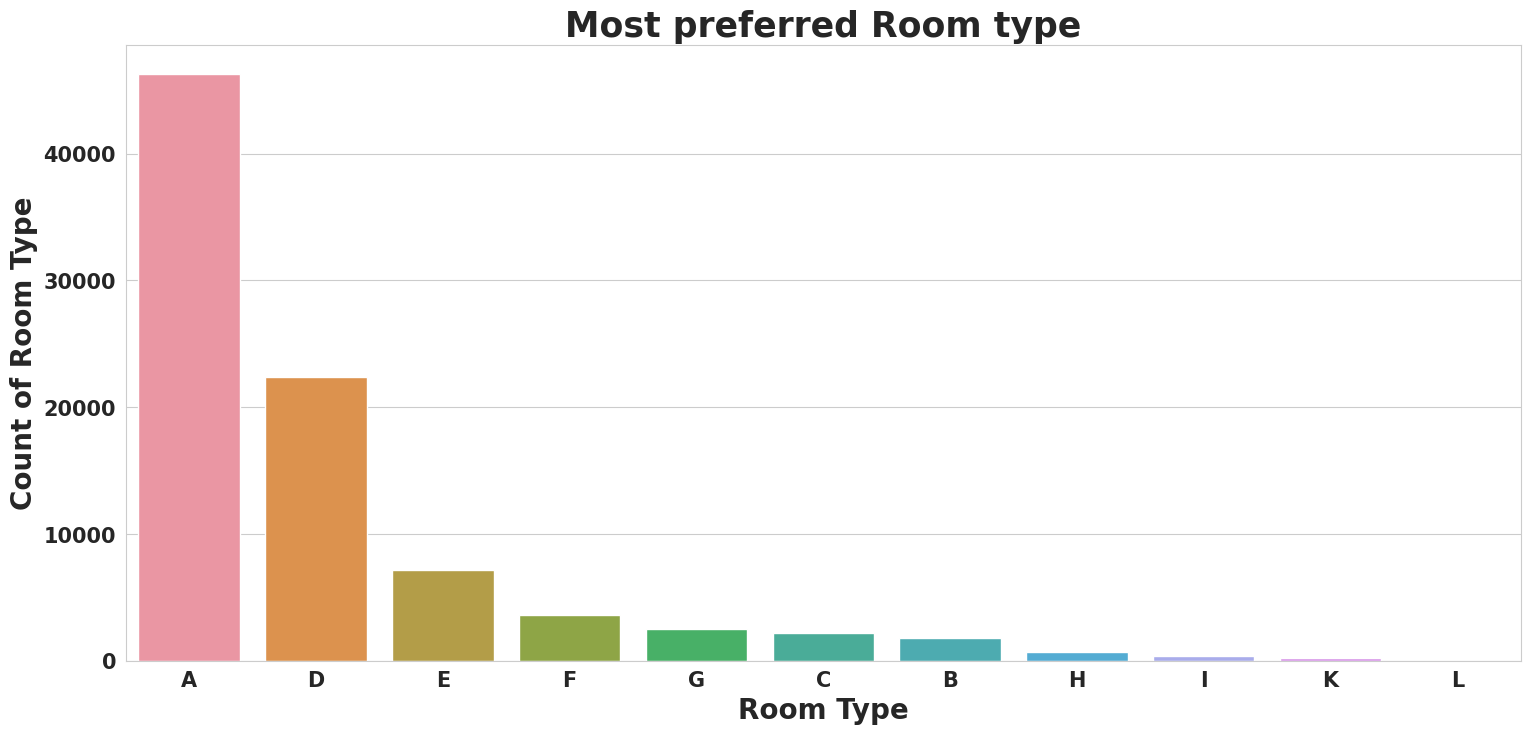

In [61]:
#set plotsize
plt.figure(figsize=(18,8))

#plotting 
sns.countplot(x=df1['assigned_room_type'],order=df1['assigned_room_type'].value_counts().index)
#  set xlabel for the plot
plt.xlabel('Room Type')
# set y label for the plot
plt.ylabel('Count of Room Type')
#set title for the plot
plt.title("Most preferred Room type")

#Observation most prefered room is room A

#### # In which month most of the bookings happened?

In [62]:
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df1.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df

,arrival_date_month,Counts
4,January,4685
3,February,6083
7,March,7489
0,April,7900
8,May,8344
6,June,7756
5,July,10043
1,August,11242
11,September,6682
10,October,6921


/home/kipkoech/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kipkoech/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Number of bookings')

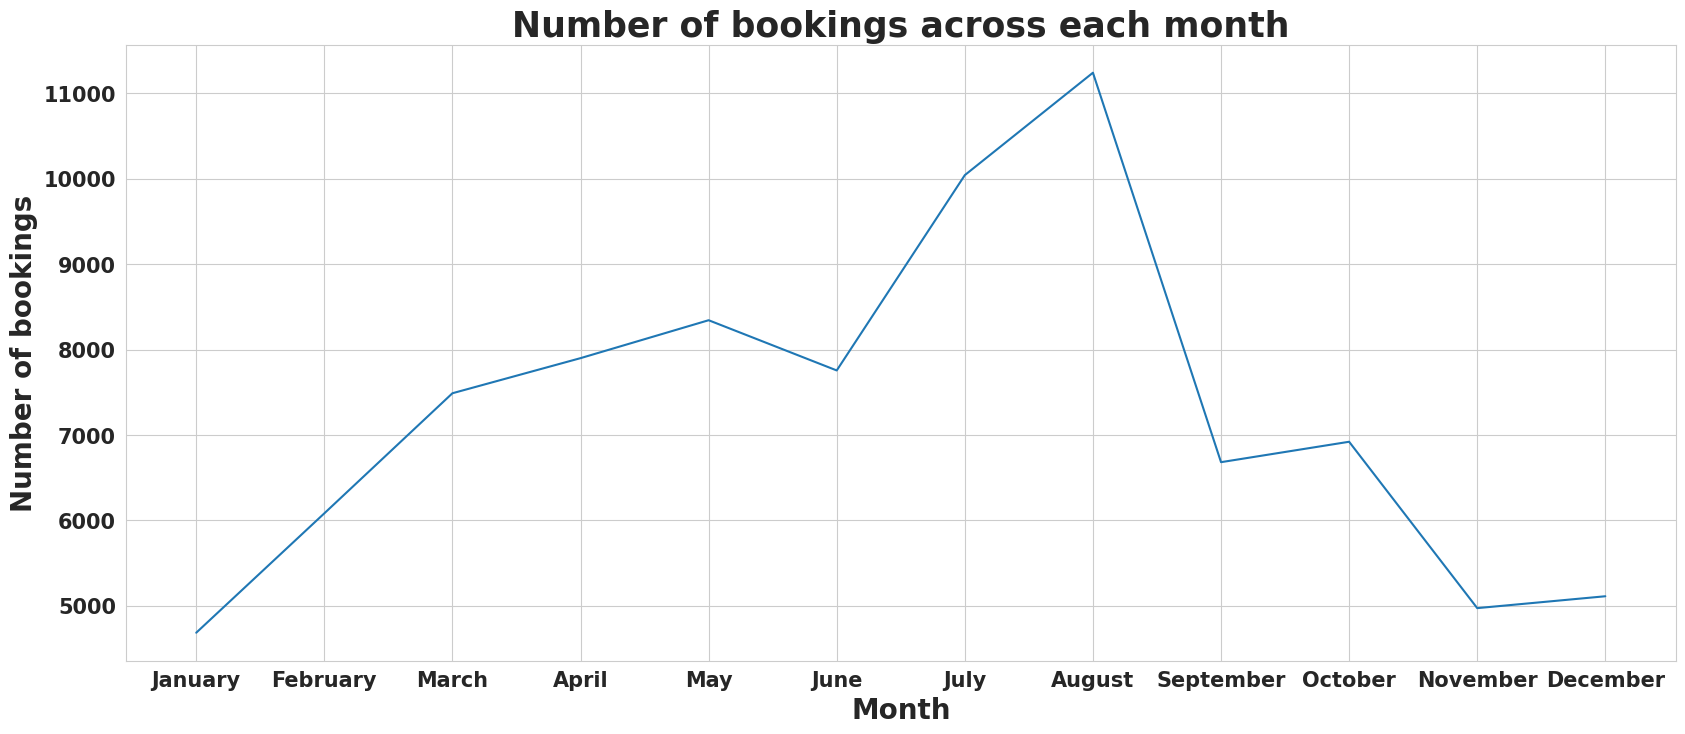

In [103]:
# set plot size
plt.figure(figsize=(20,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')

##### Observation
# July and August months had the most Bookings. Summer vaccation can be the reason for the bookings.

#Which Distribution channel is mostly used for hotel bookings?

Text(0.5, 1.0, 'Mostly Used Distribution Channel for Hotel Bookings')

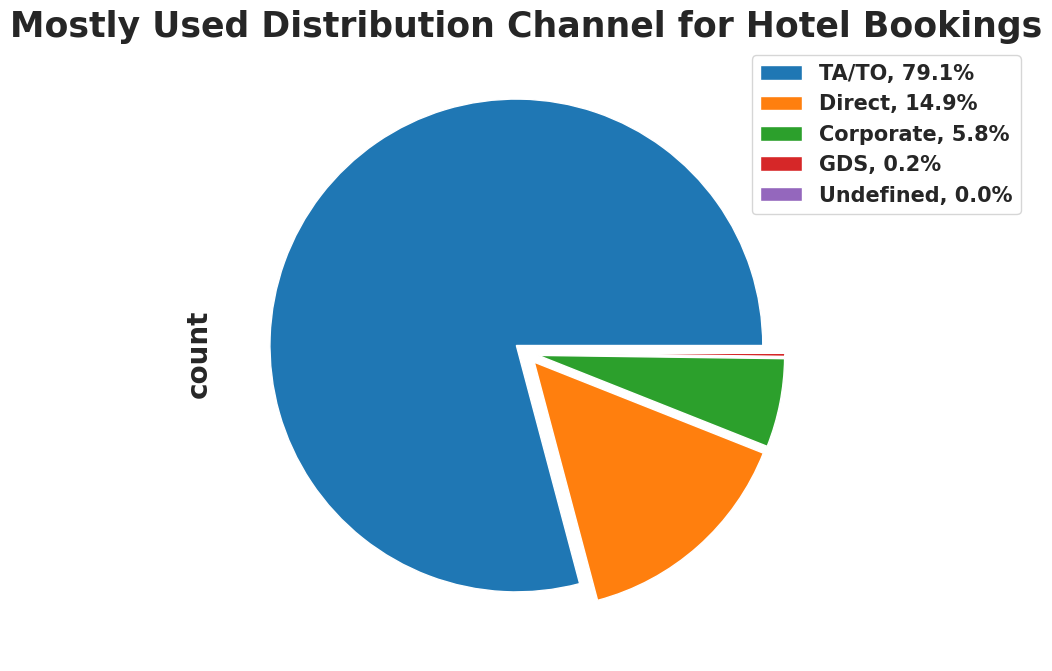

In [72]:

# Creating labels and value counts
labels = df1['distribution_channel'].value_counts().index.tolist()
counts = df1['distribution_channel'].value_counts().tolist()

# Calculating percentages
total_bookings = sum(counts)
percentages = [round(count * 100 / total_bookings, 1) for count in counts]

# Plotting the pie chart
df1['distribution_channel'].value_counts().plot.pie(explode=[0.05] * len(labels), shadow=False, figsize=(15, 8), fontsize=10, labels=None)

# Setting legends with the percentage values
labels_with_percentage = [f'{l}, {p}%' for l, p in zip(labels, percentages)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels_with_percentage)
plt.title('Mostly Used Distribution Channel for Hotel Bookings')


### #Which year had the highest bookings?

Text(0.5, 1.0, 'Year With highest no of  bookings')

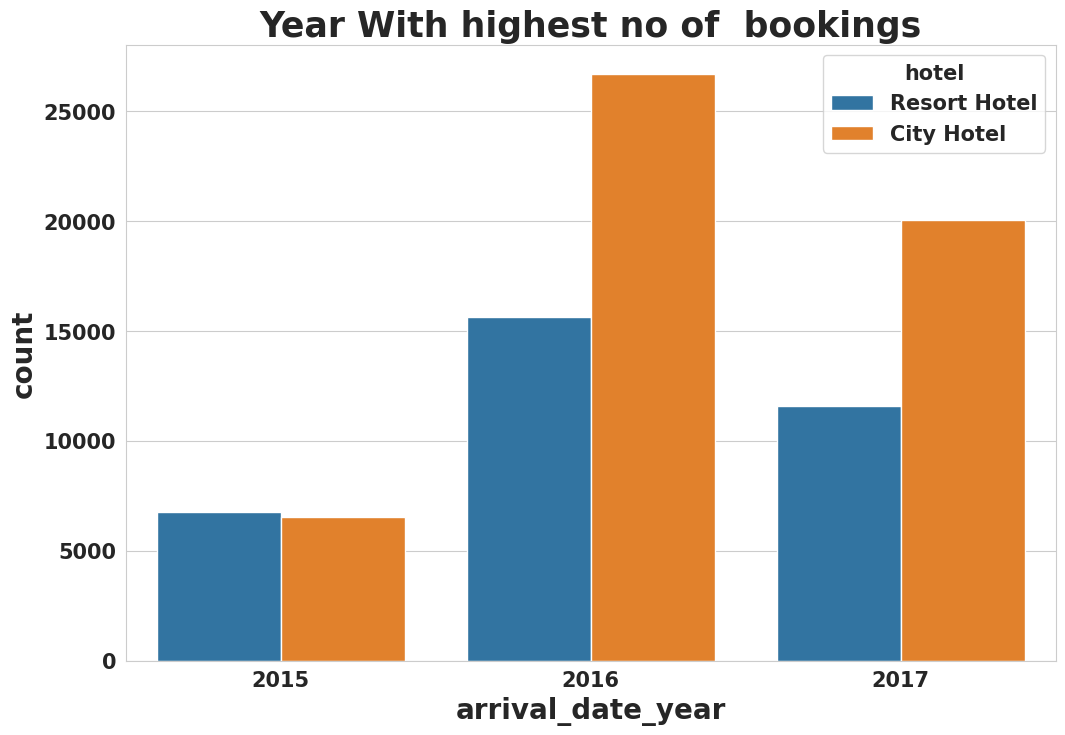

In [104]:
# set plot size
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=df1['arrival_date_year'],hue=df1['hotel'])
plt.title("Year With highest no of  bookings")

In [ ]:
#Bivariate and Multivariate Analysis


In [106]:
grup_by_hotel=df1.groupby('hotel')

Text(0.5, 1.0, 'Average Lead Time for each Hotel type')

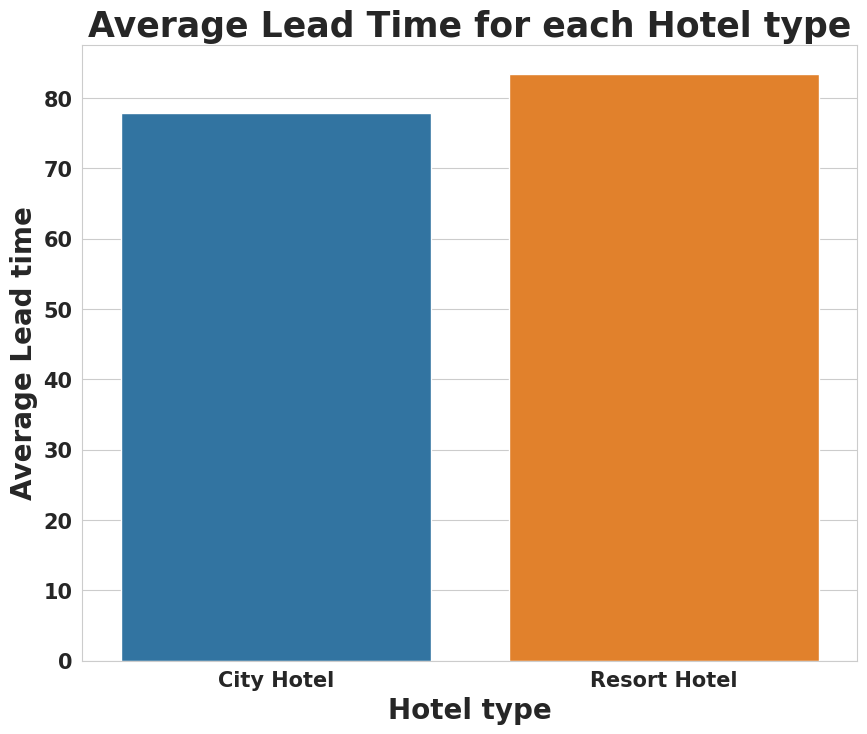

In [107]:
#group by hotel and taking mean of lead time
avg_lead_time=grup_by_hotel['lead_time'].mean().reset_index()

#set plot size
plt.figure(figsize=(10,8))

# plot the bar plot
sns.barplot(x=avg_lead_time['hotel'],y=avg_lead_time['lead_time'])
# set lables
plt.xlabel('Hotel type')
plt.ylabel('Average Lead time')
plt.title("Average Lead Time for each Hotel type")

 #### #Which hotel has highest percentage of booking cancellation?

Text(0.5, 1.0, 'Percentage of booking cancellation')

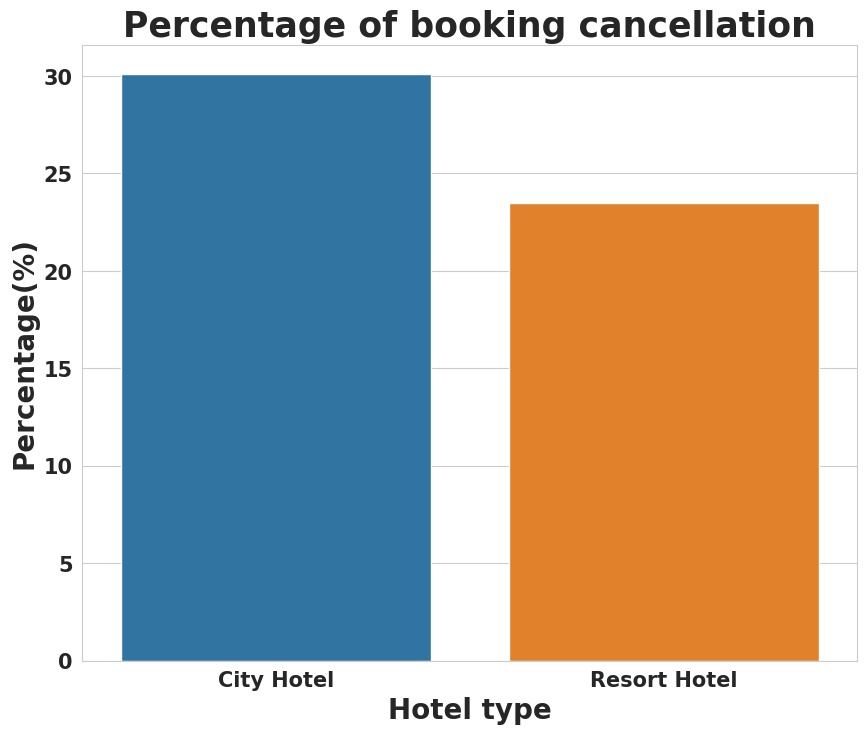

In [75]:
# booking canceled=1 
# booking not canceled= 0

# creating new DataFrame where bookings are cancelled.
canceled_df=df1[df1['is_canceled']==1]

# Grouping by hotel
canceled_df=canceled_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})

# adding 'total booking column for calculating the percentage.
canceled_df['total_booikngs']=df1.groupby('hotel').size().reset_index().rename(columns={0:"total_bookings"}).drop('hotel',axis=1)
canceled_df

#plotting the barchat
plt.figure(figsize=(10,8))
sns.barplot(x=canceled_df['hotel'],y=canceled_df['no_of_cancelled_bookings']*100/canceled_df['total_booikngs'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('Percentage(%)')
plt.title("Percentage of booking cancellation")

### Corelation Of columns

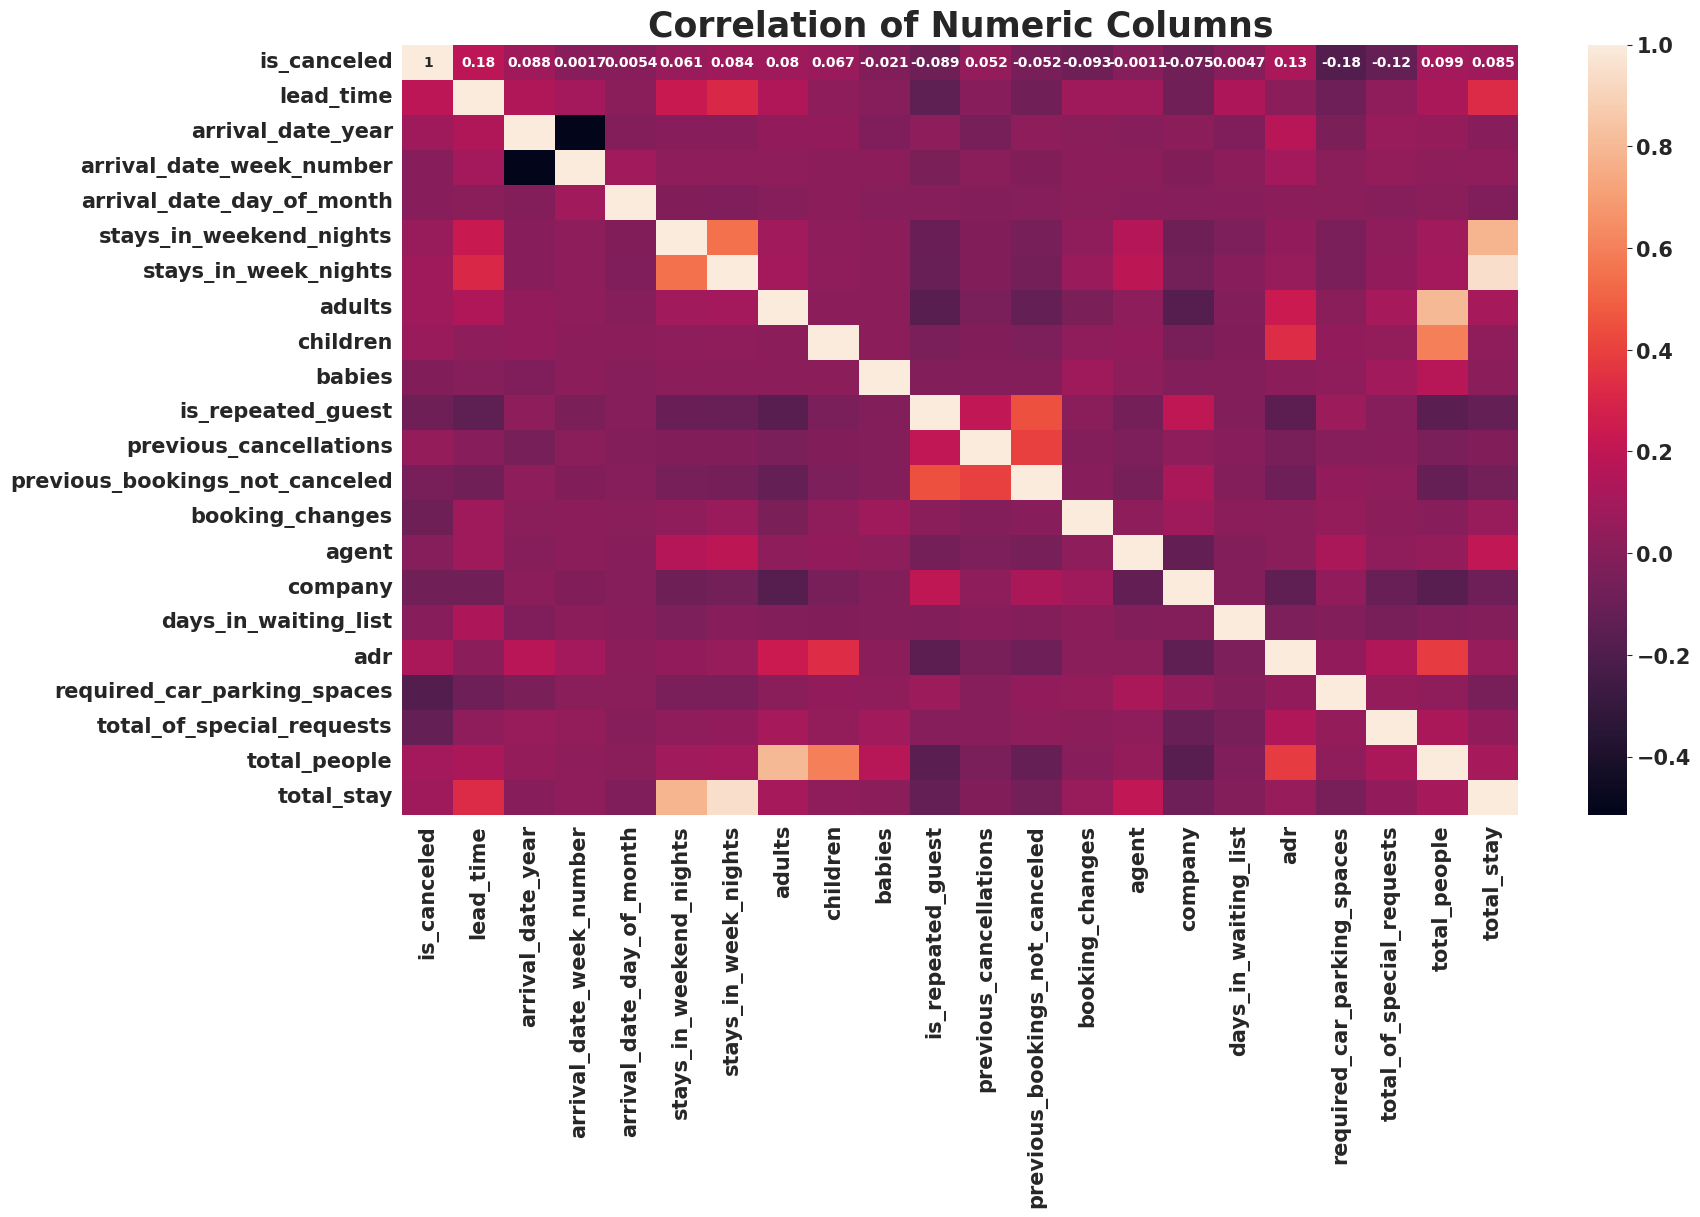

In [78]:
# Drop non-numeric columns
numeric_df = df1.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Correlation of Numeric Columns')
plt.show()


In [91]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1.407224,-0.76704,2.227051,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,-0.260668,-0.081579,-0.520068,0.927866,-1.522121,-1.746763,-0.18156,-0.10318,-0.091555,0.595363,0.356939,4.260101,-0.373175,7.800950e-18,2.133074e-17,-0.131924,-0.237979,-2.015038,-0.254873,-0.720694
1,1.407224,-0.76704,5.923385,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,-0.260668,-0.081579,-0.520068,0.927866,-1.522121,-1.746763,-0.18156,-0.10318,-0.091555,0.595363,0.356939,5.793131,-0.373175,7.800950e-18,2.133074e-17,-0.131924,-0.237979,-2.015038,-0.254873,-0.720694
2,1.407224,-0.76704,-0.907814,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,-0.260668,-0.081579,-0.520068,-0.764567,-1.522121,-1.746763,-0.18156,-0.10318,-0.091555,-0.582996,0.356939,-0.338990,-0.373175,7.800950e-18,2.133074e-17,-0.131924,-0.237979,-0.530935,-0.254873,-0.720694
3,1.407224,-0.76704,-0.851667,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,-0.260668,-0.081579,-0.520068,-0.764567,-2.311561,-2.848601,-0.18156,-0.10318,-0.091555,-0.582996,-0.707596,-0.338990,-0.373175,2.111519e+00,2.133074e-17,-0.131924,-0.237979,-0.530935,-0.254873,-0.720694
4,1.407224,-0.76704,-0.842309,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-0.262174,0.247897,-0.260668,-0.081579,-0.520068,-0.764567,0.846200,0.456914,-0.18156,-0.10318,-0.091555,-0.582996,-0.707596,-0.338990,-0.373175,1.489646e+00,2.133074e-17,-0.131924,-0.237979,-0.075810,-0.254873,0.540666


### Relationship between the repeated guests and previous bookings not canceled.?

In [96]:
repeated_guests_df=df1[df1['is_repeated_guest']==1]
repeated_guests_df_1=df1[df1['is_repeated_guest']==0]

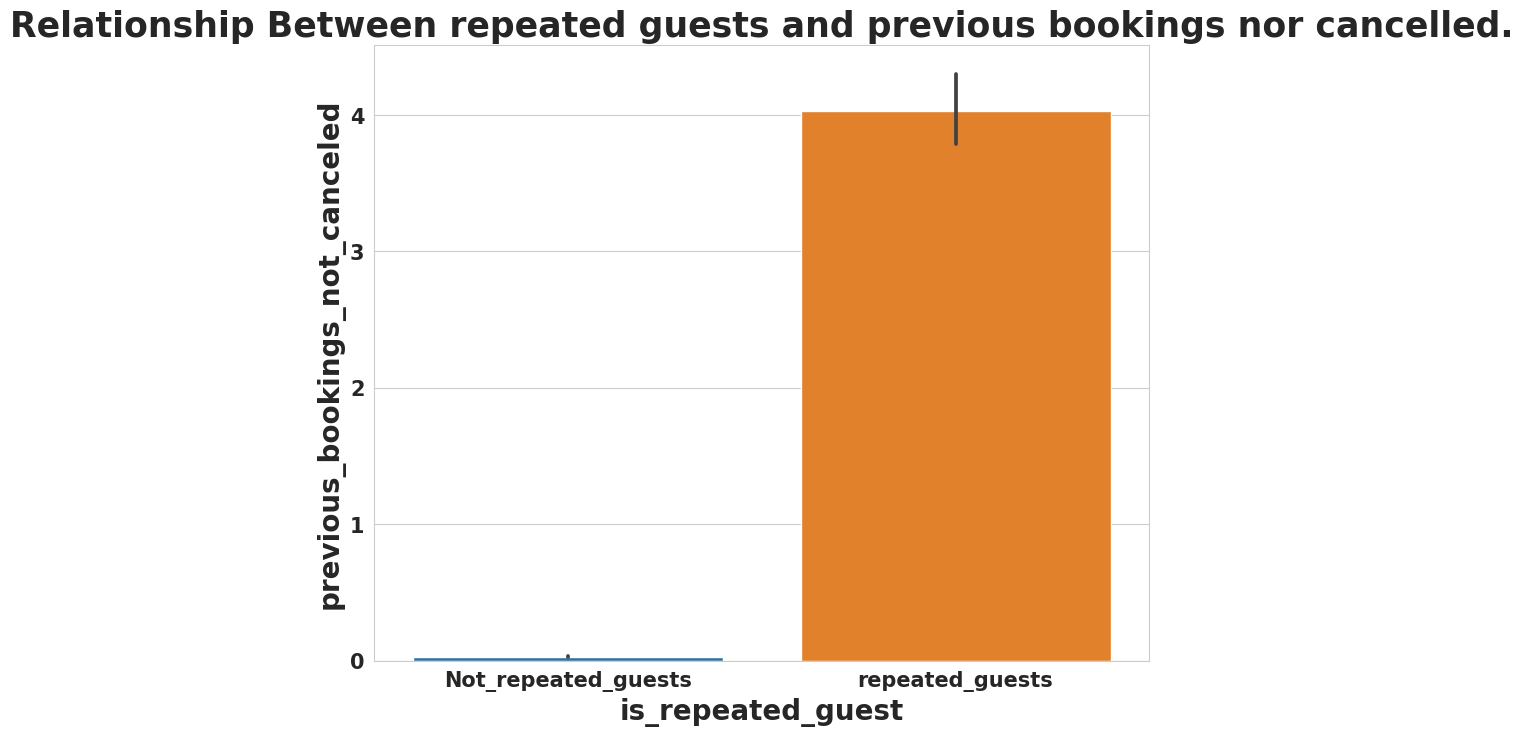

In [97]:
plt.figure(figsize=(10,8))
sns.barplot(x=df1['is_repeated_guest'],y= df1['previous_bookings_not_canceled'])
plt.xticks([0,1],['Not_repeated_guests','repeated_guests'],fontsize=15)
plt.title('Relationship Between repeated guests and previous bookings nor cancelled.')
plt.show()

### ADR across different market segment

Text(0.5, 1.0, 'Adr across market segment')

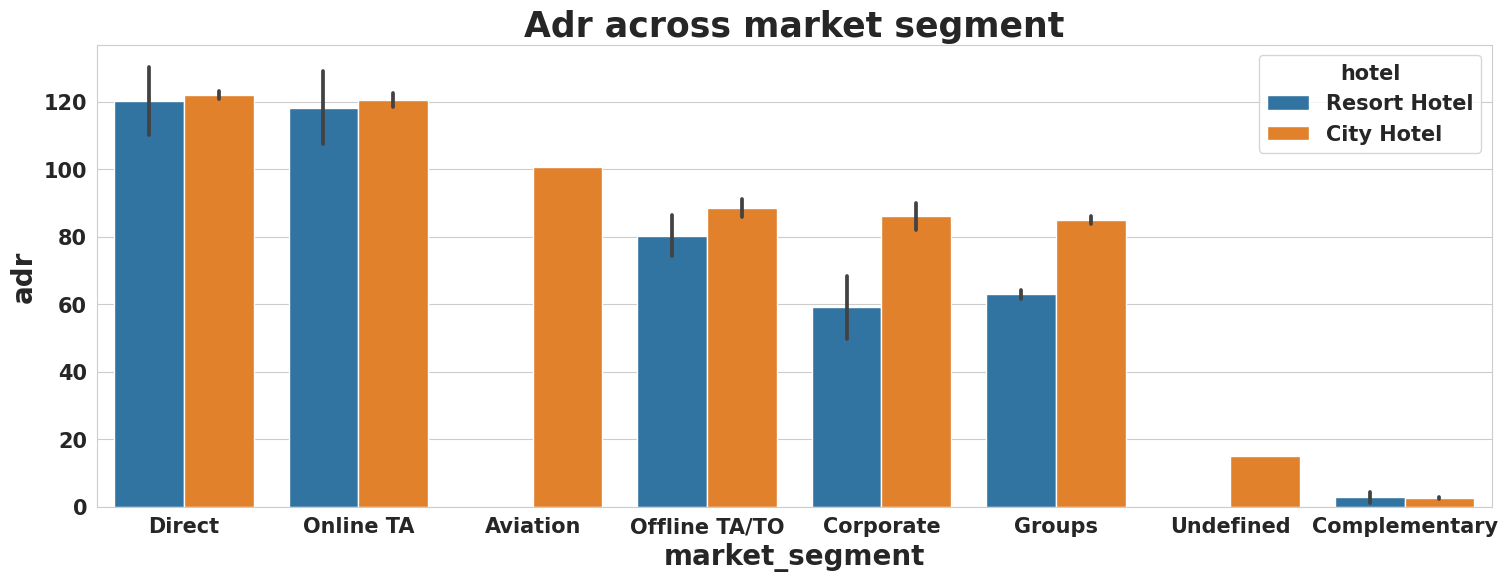

In [102]:
Grupby=df1.groupby(['market_segment','hotel','is_canceled'])['adr'].mean().reset_index()   # group by

# set plot size and plto barchart
plt.figure(figsize=(18,6))
sns.barplot(x='market_segment',y='adr',hue='hotel',data=Grupby.sort_values(by='adr',ascending=False))
plt.title('Adr across market segment')

Not Repeated guests are more likely to cancel their bookings.

In [98]:
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)

Text(0.5, 1.0, 'Relationship between  adr and total stay')

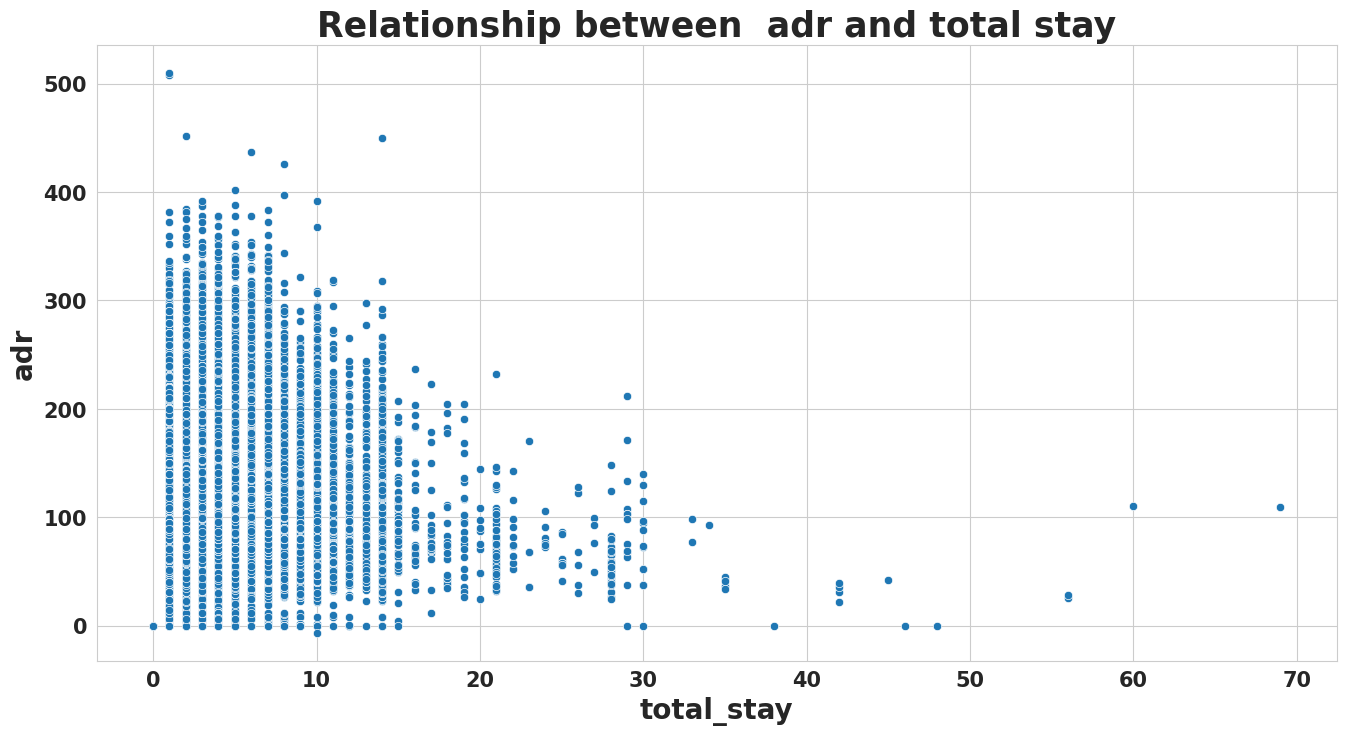

In [99]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=df1['total_stay'],y=df1['adr'])
plt.title('Relationship between  adr and total stay')

In [108]:
#What is the Optimal stay length in both types of hotels ?¶

stay = df1.groupby(['total_stay', 'hotel']).agg('count').reset_index()   # group by total stay and hotel
stay = stay.iloc[:, :3]                                                   # take 1st 3 columns
stay = stay.rename(columns={'is_canceled':'Number of stays'})    # rename the columns

Text(0.5, 0, 'total_stay(days)')

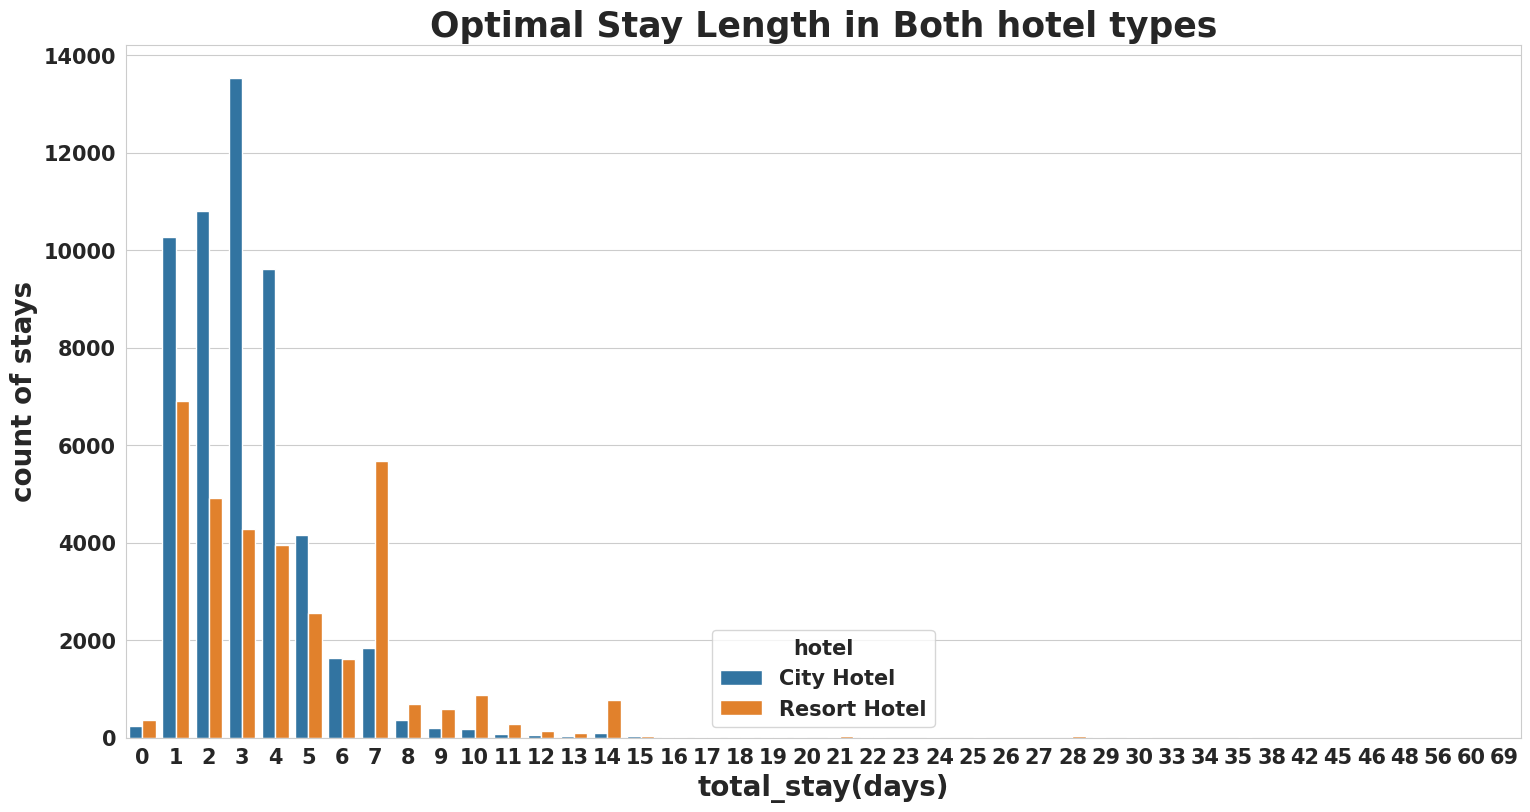

In [110]:
# set plot size and plot barchart
plt.figure(figsize=(18,9))
sns.barplot(x='total_stay',y='Number of stays',hue='hotel',data=stay)

#set labels
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')

From above scatter we can say that as the stay increases adr is decreasing. Thus for longer stays customer can get good adr.

## ADR relationship with total number of people

Text(0.5, 1.0, 'ADR v/s Total Number of people')

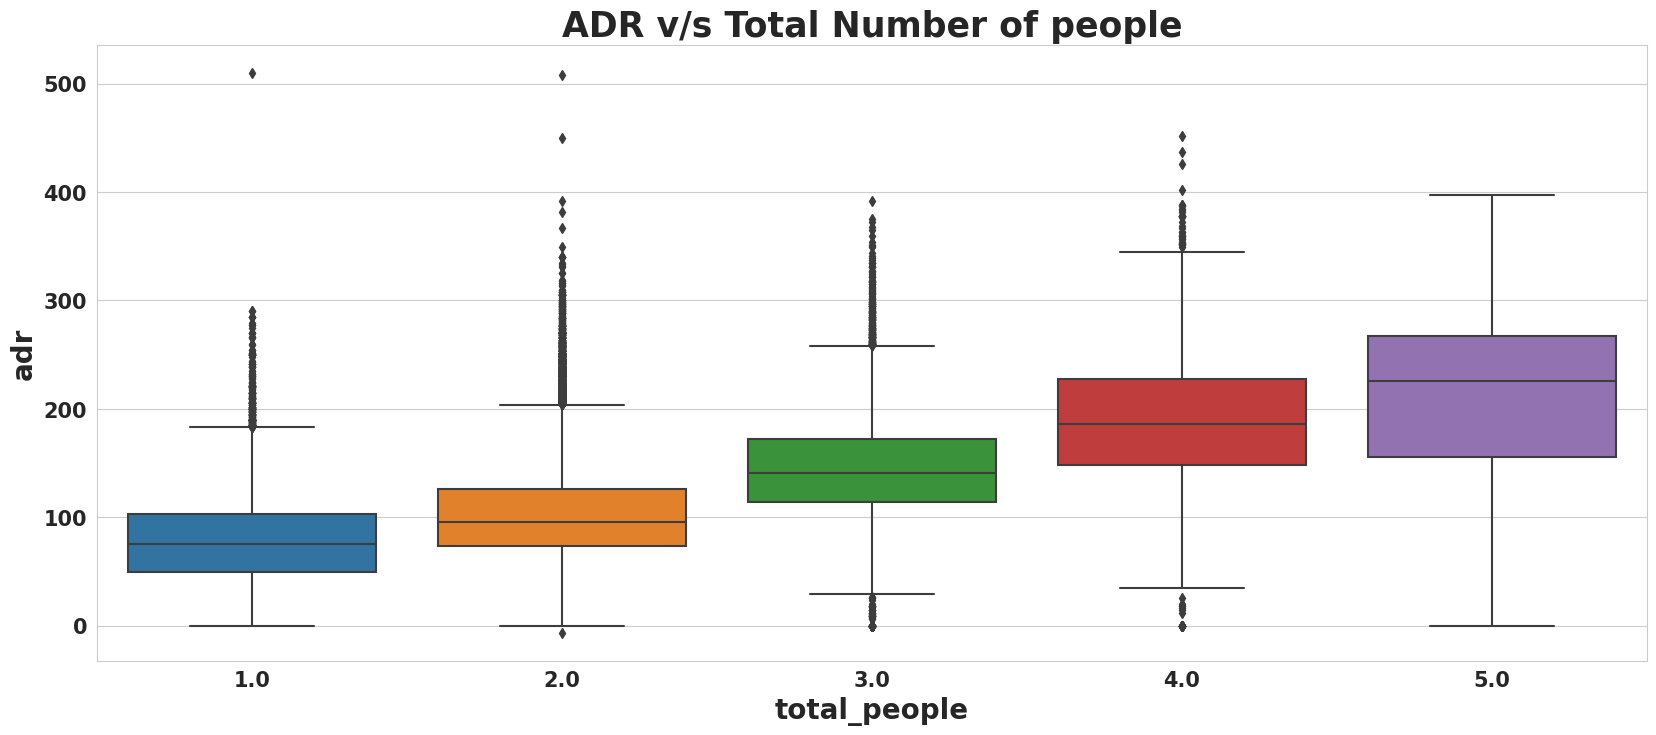

In [100]:
plt.figure(figsize=(20,8))
df2=df1[df1['total_people'] < 6]

sns.boxplot(x=df2['total_people'],y=df2['adr'])

# set lables
plt.title('ADR v/s Total Number of people')

In [26]:
print("hello")

hello
